In [1]:
# Loading Packages/ Library
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import LGBMClassifier
import pandas as pd
import tqdm as tqdm

In [2]:
# Change Directory to foldel having features data
os.chdir('/media/namng/Drive_1/nam/isic')

# Training Embedded-AI with Dropout Additive Regression Tree (DART)

The given hyperparameters for training DART model is derived from 5-fold cross-validation.

In [3]:
# Import extracted features corresponding to train and test set
X_train = np.load('X_train_luv.npy')
X_val = np.load('X_val_luv.npy')
X_test = np.load('X_test_luv.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')
# Sanity check 
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
# Skin disease's distribution
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(81020, 807) (81020,)
(10400, 807) (10400,)
(3776, 807) (3776,)
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([14648, 40940, 10680,  2820,  8396,   752,   776,  2008]))
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 647, 1991,  465,  119,  381,   36,   39,   98]))


In [4]:
#Embedded-AI training setting
classifier = LGBMClassifier(boosting_type = 'dart', learning_rate = 0.3, 
                            max_bin = 255, drop_rate = 0.015, objective = 'multiclassova',
                            num_class=8, metric='multi_error', num_leaves = 64, 
                            min_data=50, max_depth=-1, feature_fraction =1 , bagging_fraction=1,
                            n_estimators  = 1000, num_threads = 4, class_weight = 'balanced',silent = False
                           )


In [5]:
classifier.fit(X_train, y_train, verbose = True, 
               eval_set = [(X_train,y_train),(X_test,y_test)], eval_metric = 'multi_error')

[1]	training's multi_error: 0.351995	valid_1's multi_error: 0.519333
[2]	training's multi_error: 0.250726	valid_1's multi_error: 0.505297
[3]	training's multi_error: 0.205034	valid_1's multi_error: 0.487553
[4]	training's multi_error: 0.174831	valid_1's multi_error: 0.469544
[5]	training's multi_error: 0.15444	valid_1's multi_error: 0.459481
[6]	training's multi_error: 0.137316	valid_1's multi_error: 0.447034
[7]	training's multi_error: 0.123015	valid_1's multi_error: 0.435381
[8]	training's multi_error: 0.110587	valid_1's multi_error: 0.427436
[9]	training's multi_error: 0.0992507	valid_1's multi_error: 0.418697
[10]	training's multi_error: 0.0901053	valid_1's multi_error: 0.411547
[11]	training's multi_error: 0.0813867	valid_1's multi_error: 0.404661
[12]	training's multi_error: 0.0738214	valid_1's multi_error: 0.400953
[13]	training's multi_error: 0.0672372	valid_1's multi_error: 0.391419
[14]	training's multi_error: 0.0614976	valid_1's multi_error: 0.387712
[15]	training's multi_er

[115]	training's multi_error: 6.41182e-05	valid_1's multi_error: 0.287606
[116]	training's multi_error: 5.49585e-05	valid_1's multi_error: 0.290784
[117]	training's multi_error: 3.96922e-05	valid_1's multi_error: 0.291578
[118]	training's multi_error: 3.6639e-05	valid_1's multi_error: 0.290254
[119]	training's multi_error: 3.35857e-05	valid_1's multi_error: 0.290254
[120]	training's multi_error: 3.6639e-05	valid_1's multi_error: 0.291578
[121]	training's multi_error: 2.74792e-05	valid_1's multi_error: 0.291314
[122]	training's multi_error: 2.4426e-05	valid_1's multi_error: 0.2884
[123]	training's multi_error: 2.4426e-05	valid_1's multi_error: 0.290254
[124]	training's multi_error: 2.4426e-05	valid_1's multi_error: 0.288665
[125]	training's multi_error: 2.4426e-05	valid_1's multi_error: 0.289195
[126]	training's multi_error: 2.4426e-05	valid_1's multi_error: 0.288665
[127]	training's multi_error: 1.2213e-05	valid_1's multi_error: 0.2884
[128]	training's multi_error: 1.2213e-05	valid_1's

[242]	training's multi_error: 0	valid_1's multi_error: 0.270392
[243]	training's multi_error: 0	valid_1's multi_error: 0.270392
[244]	training's multi_error: 0	valid_1's multi_error: 0.270392
[245]	training's multi_error: 0	valid_1's multi_error: 0.269862
[246]	training's multi_error: 0	valid_1's multi_error: 0.268008
[247]	training's multi_error: 0	valid_1's multi_error: 0.269068
[248]	training's multi_error: 0	valid_1's multi_error: 0.268008
[249]	training's multi_error: 0	valid_1's multi_error: 0.269068
[250]	training's multi_error: 0	valid_1's multi_error: 0.269333
[251]	training's multi_error: 0	valid_1's multi_error: 0.269597
[252]	training's multi_error: 0	valid_1's multi_error: 0.268008
[253]	training's multi_error: 0	valid_1's multi_error: 0.269862
[254]	training's multi_error: 0	valid_1's multi_error: 0.269333
[255]	training's multi_error: 0	valid_1's multi_error: 0.271716
[256]	training's multi_error: 0	valid_1's multi_error: 0.270127
[257]	training's multi_error: 0	valid_1'

[371]	training's multi_error: 0	valid_1's multi_error: 0.259799
[372]	training's multi_error: 0	valid_1's multi_error: 0.261653
[373]	training's multi_error: 0	valid_1's multi_error: 0.260593
[374]	training's multi_error: 0	valid_1's multi_error: 0.261653
[375]	training's multi_error: 0	valid_1's multi_error: 0.261123
[376]	training's multi_error: 0	valid_1's multi_error: 0.261653
[377]	training's multi_error: 0	valid_1's multi_error: 0.262447
[378]	training's multi_error: 0	valid_1's multi_error: 0.262447
[379]	training's multi_error: 0	valid_1's multi_error: 0.261653
[380]	training's multi_error: 0	valid_1's multi_error: 0.262182
[381]	training's multi_error: 0	valid_1's multi_error: 0.261388
[382]	training's multi_error: 0	valid_1's multi_error: 0.261388
[383]	training's multi_error: 0	valid_1's multi_error: 0.261653
[384]	training's multi_error: 0	valid_1's multi_error: 0.261653
[385]	training's multi_error: 0	valid_1's multi_error: 0.261653
[386]	training's multi_error: 0	valid_1'

[500]	training's multi_error: 0	valid_1's multi_error: 0.255032
[501]	training's multi_error: 0	valid_1's multi_error: 0.255297
[502]	training's multi_error: 0	valid_1's multi_error: 0.255561
[503]	training's multi_error: 0	valid_1's multi_error: 0.255826
[504]	training's multi_error: 0	valid_1's multi_error: 0.254502
[505]	training's multi_error: 0	valid_1's multi_error: 0.255297
[506]	training's multi_error: 0	valid_1's multi_error: 0.255297
[507]	training's multi_error: 0	valid_1's multi_error: 0.256091
[508]	training's multi_error: 0	valid_1's multi_error: 0.256091
[509]	training's multi_error: 0	valid_1's multi_error: 0.256091
[510]	training's multi_error: 0	valid_1's multi_error: 0.256091
[511]	training's multi_error: 0	valid_1's multi_error: 0.255826
[512]	training's multi_error: 0	valid_1's multi_error: 0.256621
[513]	training's multi_error: 0	valid_1's multi_error: 0.257945
[514]	training's multi_error: 0	valid_1's multi_error: 0.257945
[515]	training's multi_error: 0	valid_1'

[629]	training's multi_error: 0	valid_1's multi_error: 0.246292
[630]	training's multi_error: 0	valid_1's multi_error: 0.246557
[631]	training's multi_error: 0	valid_1's multi_error: 0.246822
[632]	training's multi_error: 0	valid_1's multi_error: 0.245763
[633]	training's multi_error: 0	valid_1's multi_error: 0.244703
[634]	training's multi_error: 0	valid_1's multi_error: 0.244968
[635]	training's multi_error: 0	valid_1's multi_error: 0.244439
[636]	training's multi_error: 0	valid_1's multi_error: 0.247087
[637]	training's multi_error: 0	valid_1's multi_error: 0.246292
[638]	training's multi_error: 0	valid_1's multi_error: 0.245763
[639]	training's multi_error: 0	valid_1's multi_error: 0.247352
[640]	training's multi_error: 0	valid_1's multi_error: 0.247881
[641]	training's multi_error: 0	valid_1's multi_error: 0.247881
[642]	training's multi_error: 0	valid_1's multi_error: 0.246822
[643]	training's multi_error: 0	valid_1's multi_error: 0.247087
[644]	training's multi_error: 0	valid_1'

[758]	training's multi_error: 0	valid_1's multi_error: 0.246557
[759]	training's multi_error: 0	valid_1's multi_error: 0.246292
[760]	training's multi_error: 0	valid_1's multi_error: 0.246557
[761]	training's multi_error: 0	valid_1's multi_error: 0.246292
[762]	training's multi_error: 0	valid_1's multi_error: 0.247087
[763]	training's multi_error: 0	valid_1's multi_error: 0.247087
[764]	training's multi_error: 0	valid_1's multi_error: 0.247617
[765]	training's multi_error: 0	valid_1's multi_error: 0.246292
[766]	training's multi_error: 0	valid_1's multi_error: 0.246557
[767]	training's multi_error: 0	valid_1's multi_error: 0.246822
[768]	training's multi_error: 0	valid_1's multi_error: 0.244968
[769]	training's multi_error: 0	valid_1's multi_error: 0.244174
[770]	training's multi_error: 0	valid_1's multi_error: 0.244439
[771]	training's multi_error: 0	valid_1's multi_error: 0.244703
[772]	training's multi_error: 0	valid_1's multi_error: 0.245233
[773]	training's multi_error: 0	valid_1'

[887]	training's multi_error: 0	valid_1's multi_error: 0.243909
[888]	training's multi_error: 0	valid_1's multi_error: 0.243909
[889]	training's multi_error: 0	valid_1's multi_error: 0.243379
[890]	training's multi_error: 0	valid_1's multi_error: 0.244439
[891]	training's multi_error: 0	valid_1's multi_error: 0.244703
[892]	training's multi_error: 0	valid_1's multi_error: 0.244968
[893]	training's multi_error: 0	valid_1's multi_error: 0.244703
[894]	training's multi_error: 0	valid_1's multi_error: 0.243909
[895]	training's multi_error: 0	valid_1's multi_error: 0.243644
[896]	training's multi_error: 0	valid_1's multi_error: 0.243379
[897]	training's multi_error: 0	valid_1's multi_error: 0.243379
[898]	training's multi_error: 0	valid_1's multi_error: 0.243644
[899]	training's multi_error: 0	valid_1's multi_error: 0.243379
[900]	training's multi_error: 0	valid_1's multi_error: 0.244703
[901]	training's multi_error: 0	valid_1's multi_error: 0.244703
[902]	training's multi_error: 0	valid_1'

LGBMClassifier(bagging_fraction=1, boosting_type='dart',
               class_weight='balanced', colsample_bytree=1.0, drop_rate=0.015,
               feature_fraction=1, importance_type='split', learning_rate=0.3,
               max_bin=255, max_depth=-1, metric='multi_error',
               min_child_samples=20, min_child_weight=0.001, min_data=50,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_class=8,
               num_leaves=64, num_threads=4, objective='multiclassova',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [6]:
# Saving embedded-AI model
classifier.booster_.save_model('embbeded-AI.txt', num_iteration = classifier.best_iteration_)
classifier.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('multi_error', 0.0)]),
             'valid_1': OrderedDict([('multi_error', 0.2420550847457627)])})

In [7]:
# Derive importance matrix from Embedded-AI model
im_mat = classifier.feature_importances_
np.save('importance.npy', im_mat)

In [8]:
# Testing 
gbm = lgb.Booster(model_file='embbeded-AI.txt')
# Generate soft labels for meta-data
y_val_prob = gbm.predict(X_val)
y_test_prob = gbm.predict(X_test)
print(y_val_prob.shape, y_test_prob.shape)
np.save('y_val_prob.npy', y_val_prob)
np.save('y_test_prob.npy', y_test_prob)

(10400, 8) (3776, 8)


In [9]:
y_val_pred = np.argmax(y_val_prob, axis = 1)
y_test_pred = np.argmax(y_test_prob, axis = 1)

In [10]:
def get_results(y_true, y_pred):
    true_label = y_true
    #pred_label = np.argmax(y_pred,axis = 1)
    pred_label = y_pred
    dx = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC' ]
    #dx = ['Benign', 'Malignant']
    target_names = dx
    cm = confusion_matrix(true_label, pred_label)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)
    print('\n','Accuracy is',accuracy_score(true_label,pred_label))
    print(classification_report(true_label,pred_label))
    print(confusion_matrix(true_label,pred_label))


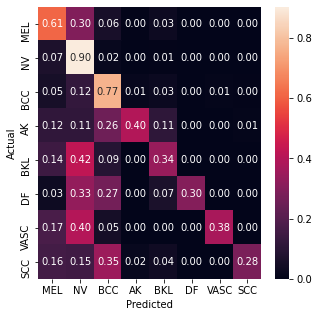


 Accuracy is 0.72875
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1704
           1       0.78      0.90      0.83      5192
           2       0.70      0.77      0.73      1504
           3       0.77      0.40      0.52       344
           4       0.70      0.34      0.46      1152
           5       1.00      0.30      0.46       120
           6       0.79      0.38      0.51       160
           7       0.86      0.28      0.42       224

    accuracy                           0.73     10400
   macro avg       0.77      0.50      0.57     10400
weighted avg       0.73      0.73      0.71     10400

[[1041  505   98    7   49    0    4    0]
 [ 366 4690  100    8   28    0    0    0]
 [  82  181 1160   22   40    0   12    7]
 [  40   39   88  136   38    0    0    3]
 [ 167  489  103    0  393    0    0    0]
 [   4   40   32    0    8   36    0    0]
 [  28   64    8    0    0    0   60    0]
 [  36   34   79    4    8

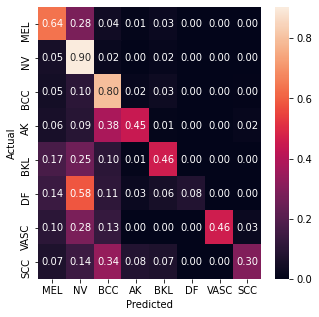


 Accuracy is 0.7579449152542372
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       647
           1       0.82      0.90      0.86      1991
           2       0.65      0.80      0.71       465
           3       0.66      0.45      0.53       119
           4       0.70      0.46      0.55       381
           5       1.00      0.08      0.15        36
           6       1.00      0.46      0.63        39
           7       0.78      0.30      0.43        98

    accuracy                           0.76      3776
   macro avg       0.78      0.51      0.57      3776
weighted avg       0.76      0.76      0.75      3776

[[ 413  181   27    6   18    0    0    2]
 [ 109 1800   48    1   32    0    0    1]
 [  22   48  371    7   15    0    0    2]
 [   7   11   45   53    1    0    0    2]
 [  65   97   40    4  175    0    0    0]
 [   5   21    4    1    2    3    0    0]
 [   4   11    5    0    0    0   18    1]
 [   7   14   3

In [11]:
# Get classification report of Embedded-AI
get_results(y_val, y_val_pred)
get_results(y_test, y_test_pred)

# Generate Meta-data for training SAIA decision Unit

In [12]:
# Soft labels from Embedded-AI model
m_val = np.load('y_val_prob.npy')
m_test = np.load('y_test_prob.npy')
# Soft label by Networked-AI Model
s_val = np.load('Ess_val.npy')
s_test = np.load('Ess_test.npy')
# Grouth Truth 
val_lab = np.array(pd.read_csv('SF_val/y_true.txt', header = None), dtype = 'int64')
test_lab = np.array(pd.read_csv('SF_test/y_true.txt', header = None),dtype = 'int64')
val_lab = val_lab.reshape(len(val_lab),)
test_lab = test_lab.reshape(len(test_lab),)
print(m_val.shape, s_val.shape)
print(m_test.shape, s_test.shape)
# Reshape the vectors
m_val_lab = np.argmax(m_val, axis = 1)
m_test_lab = np.argmax(m_test, axis = 1)
s_val_lab = np.argmax(s_val, axis = 1)
s_test_lab = np.argmax(s_test, axis = 1)

(10400, 8) (10400, 8)
(3776, 8) (3776, 8)


In [13]:
# Create DataFrame for each set
meta_val = pd.DataFrame([])
meta_val['Mobile'] = m_val_lab
meta_val['Server'] = s_val_lab
meta_val['Actual'] = val_lab
#
meta_test = pd.DataFrame([])
meta_test['Mobile'] = m_test_lab
meta_test['Server'] = s_test_lab
meta_test['Actual'] = test_lab

In [14]:
# Naive Decision rule
dec = []
for i in range(len(meta_val)):
    if meta_val['Mobile'][i] == meta_val['Server'][i]:
        dec.append('Local')
    elif ((meta_val['Mobile'][i] != meta_val['Server'][i]) and (meta_val['Server'][i] != meta_val['Actual'][i])) :
        dec.append('Local')
    elif meta_val['Mobile'][i] != meta_val['Server'][i]:
        dec.append('Remote')
meta_val['Decision'] = dec

dec = []
for i in range(len(meta_test)):
    if meta_test['Mobile'][i] == meta_test['Server'][i]:
        dec.append('Local')
    elif ((meta_test['Mobile'][i] != meta_test['Server'][i]) and (meta_test['Server'][i] != meta_test['Actual'][i])) :
        dec.append('Local')
    elif meta_test['Mobile'][i] != meta_test['Server'][i]:
        dec.append('Remote')
meta_test['Decision'] = dec

In [15]:
# Checking some samples from meta-data
meta_val.sample(10)

,Mobile,Server,Actual,Decision
2234,3,3,3,Local
3139,1,1,1,Local
731,1,1,1,Local
9035,1,0,0,Remote
5975,7,7,7,Local
6635,0,1,1,Remote
3972,1,1,1,Local
9813,1,1,1,Local
2199,4,4,4,Local
5225,1,1,1,Local


In [16]:
meta_test.sample(10)

,Mobile,Server,Actual,Decision
1447,1,1,1,Local
943,1,1,1,Local
2690,6,6,6,Local
347,1,0,0,Remote
3698,2,1,1,Remote
3318,1,1,1,Local
1626,1,1,1,Local
1081,6,6,6,Local
3770,0,0,4,Local
3271,1,1,1,Local


In [17]:
# Save meta-data for training SAIA decision unit
meta_val.to_csv('meta_val.csv', index = False)
meta_test.to_csv('meta_test.csv', index = False)

# SAIA decision unit trainning

In [18]:
# Call-out meta-data labels
val = pd.read_csv('meta_val.csv')
test = pd.read_csv('meta_test.csv')
# Checking class distribution
val['Decision'].value_counts(), test['Decision'].value_counts()

(Local     8455
 Remote    1945
 Name: Decision, dtype: int64,
 Local     3141
 Remote     635
 Name: Decision, dtype: int64)

In [19]:
# Meta-data
X_train = np.load('y_val_prob.npy')
X_test = np.load('y_test_prob.npy')

In [20]:
# Re-label the class name by numbers. 
# "Local" := 0
# "Remote":= 1
y_train = []
for i in range(len(val['Decision'])):
    if val['Decision'][i] == 'Remote':
        y_train.append(1)
    else:
        y_train.append(0)
y_train = np.array(y_train)
#
y_test = []
for i in range(len(test['Decision'])):
    if test['Decision'][i] == 'Remote':
        y_test.append(1)
    else:
        y_test.append(0)
y_test = np.array(y_test)
# Sanity check
np.unique(y_train, return_counts = True), np.unique(y_test, return_counts = True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10400, 8) (3776, 8) (10400,) (3776,)


In [21]:
# Prepare DMatrix for LightGBM model
lgb_train = lgb.Dataset(X_train, y_train, params={'verbose': -1}, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, params={'verbose': -1},free_raw_data=False)


# Training SAIA decision unit 
- We are able to choose a range for $\epsilon$. In our experiment on Skin Lesion dataset, we investigate $\epsilon \in [1,100]$, since the overall performance is not improved beyond the upper bound limit.


In [22]:
du_acc = []
du_cfm = []
final_acc = []
tn = []
fn = []
fp = []
tp = []
epsilons = 100
for c in tqdm.tqdm(range(1,epsilons)):
    params = {}
    params['learning_rate'] = 0.5
    #params['max_bin']  = 255
    # Weight for minimizing the error rate of (Actual:Remote - Predicted: Local)
    params['scale_pos_weight'] = c
    params['boosting_type'] = 'dart'
    params['objective'] = 'binary'
    params['metric'] = 'binary_error'
    params['sub_feature'] = 1
    params['num_leaves'] = 2
    params['min_data'] = 50
    params['max_depth'] = -1
    params['feature_fraction'] = 1
    params['bagging_fraction'] = 1
    params['n_estimators '] = 150
    evals_result = {} 
    gbm = lgb.train(params, lgb_train,  valid_sets=lgb_eval, 
                verbose_eval=False, evals_result=evals_result)
                    #,early_stopping_rounds=100)
    y_pred=gbm.predict(X_test)
    #convert into binary values
    for i in range(0,len(y_pred)):
        if y_pred[i]>=0.5:       # setting threshold to .5
            y_pred[i]=1
        else:  
            y_pred[i]=0
    du_acc.append(accuracy_score(y_test,y_pred))
    cfm = confusion_matrix(y_test, y_pred)
    du_cfm.append(cfm)
    tn.append(cfm[0,0])
    tp.append(cfm[1,1])
    fn.append(cfm[1,0])
    fp.append(cfm[0,1])
    test['DU'] = y_pred
    final_pred_test = []
    for i in range(len(test)):
        if test['DU'][i] == 1:
            final_pred_test.append(test['Server'][i])
        elif test['DU'][i] == 0:
            final_pred_test.append(test['Mobile'][i])
        
    final_acc.append(accuracy_score(test['Actual'],final_pred_test))

100%|██████████| 99/99 [00:19<00:00,  5.06it/s]


In [23]:
# Save result
saia = pd.DataFrame([])
saia['alpha'] = range(1,100)
saia['decision_unit_acc'] = du_acc
saia['true_neg'] = tn
saia['true_pos'] = tp
saia['false_neg'] = fn
saia['false_pos'] = fp
saia['overall_acc'] = final_acc

In [24]:
saia.to_csv('SAIS_results.csv', index = False)

# Evaluate the overall accuracy in compare to random decision unit

In [25]:
df = pd.read_csv('SAIS_results.csv')
# Randomly distribute data to server/mobile
choices = [0, 1]
mobile_w = (df['true_neg']+df['false_neg'])/len(test)
server_w = (df['true_pos']+df['false_pos'])/len(test)

In [26]:
# Simulate 100 runs
mean_acc = []
std_acc = []
for i in tqdm.tqdm(range(len(df))):
    n_guess = []
    # Change k:= number of simulations
    for k in range(100):
        guess_acc = []
        weights = [mobile_w[i],server_w[i]]
        rnd_g = np.random.choice(choices, p=weights, size = len(test))
        y_guess = []
        for j in range(len(rnd_g)):
            if rnd_g[j] == 0:
                y_guess.append(test['Mobile'][j])
            else:
                y_guess.append(test['Server'][j])
        guess_acc.append(accuracy_score(test['Actual'], y_guess))
        n_guess.append(guess_acc)
    mean_acc.append(np.array(n_guess).mean())
    std_acc.append(np.array(n_guess).std())

100%|██████████| 99/99 [09:29<00:00,  5.76s/it]


/home/namng/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


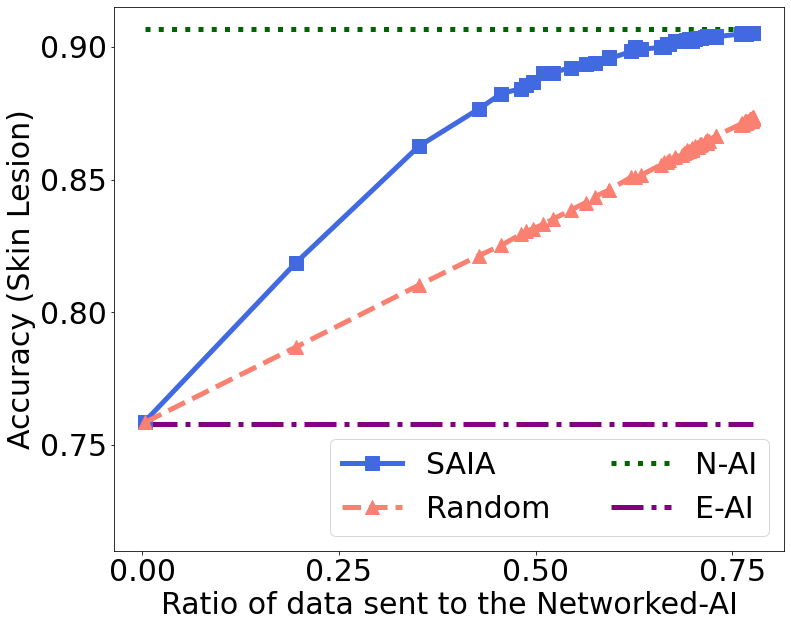

In [29]:
# Plots
plt.rcParams["font.family"] = "Times New Roman"
ratio = (df['true_pos'] +df['false_pos'])/len(test)
n_obs = 101
size = 30
fig,ax = plt.subplots(figsize = (12,10))
ax.plot(ratio[0:n_obs], df['overall_acc'][0:n_obs,], color = 'royalblue', label = "SAIA", marker = 's',
        linestyle = 'solid', linewidth=5, markersize=14)
ax.plot(ratio[0:n_obs], mean_acc[0:n_obs], color = 'salmon', label = 'Random', 
           marker = '^', linestyle = 'dashed', linewidth=5, markersize=14)
ax.hlines(0.90675, min(ratio[0:n_obs]),max(ratio[0:n_obs]) , linestyle = ':', 
          label = 'N-AI', color = 'darkgreen', linewidth=5)
ax.hlines(0.7579, min(ratio[0:n_obs]), max(ratio[0:n_obs]), linestyle = '-.', label = 'E-AI',
          color = 'purple', linewidth=5)
ax.set_xlabel('Ratio of data sent to the Networked-AI',fontsize = size)
ax.set_xticks((0,0.25,0.5,0.75))
ax.set_yticks((0.75,0.80,0.85,0.90))
ax.set_ylabel('Accuracy (Skin Lesion)', fontsize = size)
ax.set_ylim(0.71,0.915)
ax.tick_params(axis='both', which='major', labelsize=size)
ax.legend(loc = 'lower right', fontsize= size,ncol=2)

fig.show()